<a href="https://colab.research.google.com/github/mrinalsarkar1999/Simple-web-pages-for-practice/blob/master/HandGestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello there")

Hello there


In [ ]:
print("Welcome students!")

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
# Step 2: Load and explore the MNIST dataset
print("Step 2: Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")


Step 2: Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10



Step 3: Visualizing sample images...


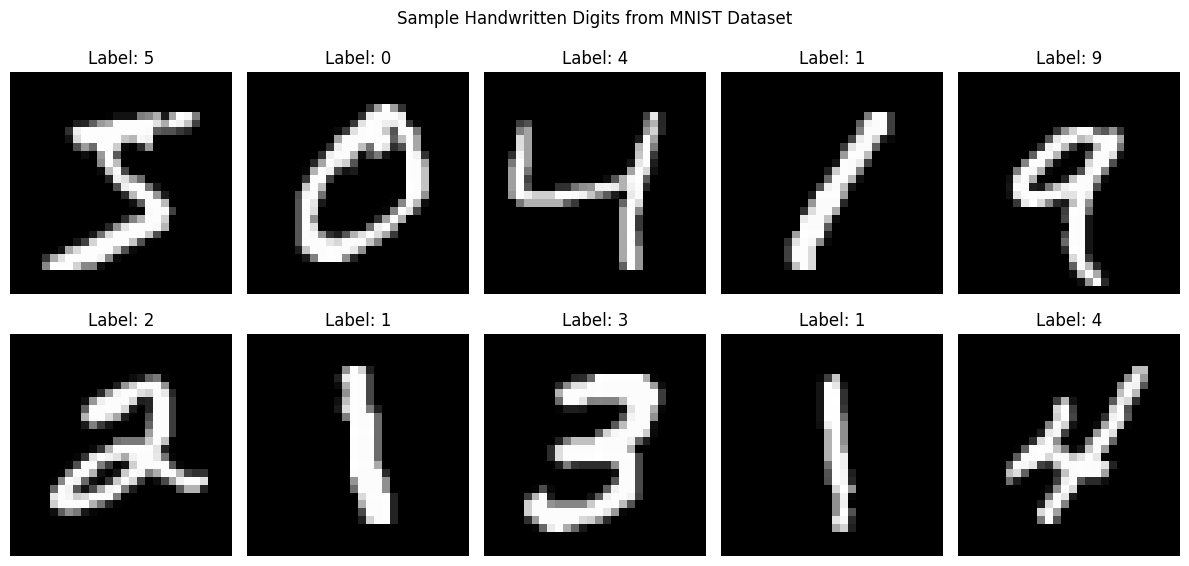

In [4]:
print("\nStep 3: Visualizing sample images...")
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample Handwritten Digits from MNIST Dataset')
plt.tight_layout()
plt.show()

In [5]:
print("\nStep 4: Preprocessing the data...")

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for neural network (flatten 28x28 images to 784 features)
x_train_flattened = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_flattened = x_test.reshape(x_test.shape[0], 28 * 28)

# Convert labels to categorical (one-hot encoding)
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"Reshaped training data: {x_train_flattened.shape}")
print(f"Categorical labels shape: {y_train_categorical.shape}")


Step 4: Preprocessing the data...
Reshaped training data: (60000, 784)
Categorical labels shape: (60000, 10)


In [6]:
# Step 5: Build the neural network model
print("\nStep 5: Building the model...")

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden_layer_1'),
    layers.Dropout(0.2, name='dropout_layer'),  # Prevents overfitting
    layers.Dense(64, activation='relu', name='hidden_layer_2'),
    layers.Dense(10, activation='softmax', name='output_layer')  # 10 classes (0-9)
])

# Display model architecture
model.summary()


Step 5: Building the model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
print("\nStep 6: Compiling the model...")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



Step 6: Compiling the model...


In [22]:
# Step 7: Train the model
print("\nStep 7: Training the model...")
history = model.fit(
    x_train_flattened,
    y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.1,  # Use 10% of training data for validation
    verbose=1
)


Step 7: Training the model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9838 - loss: 0.0488 - val_accuracy: 0.9807 - val_loss: 0.0676
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0424 - val_accuracy: 0.9805 - val_loss: 0.0725
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0404 - val_accuracy: 0.9822 - val_loss: 0.0697
Epoch 4/10


KeyboardInterrupt: 

In [9]:
print("\nStep 8: Visualizing training history...")
plt.figure(figsize=(12, 4))


Step 8: Visualizing training history...


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

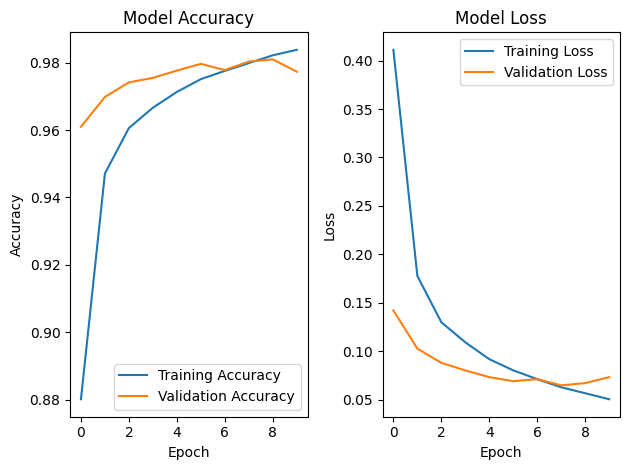

In [10]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Step 9: Evaluate the model
print("\nStep 9: Evaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Step 9: Evaluating the model...
Test Accuracy: 0.9757
Test Loss: 0.0782


In [12]:
print("\nStep 10: Making predictions...")
predictions = model.predict(x_test_flattened)
predicted_classes = np.argmax(predictions, axis=1)


Step 10: Making predictions...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



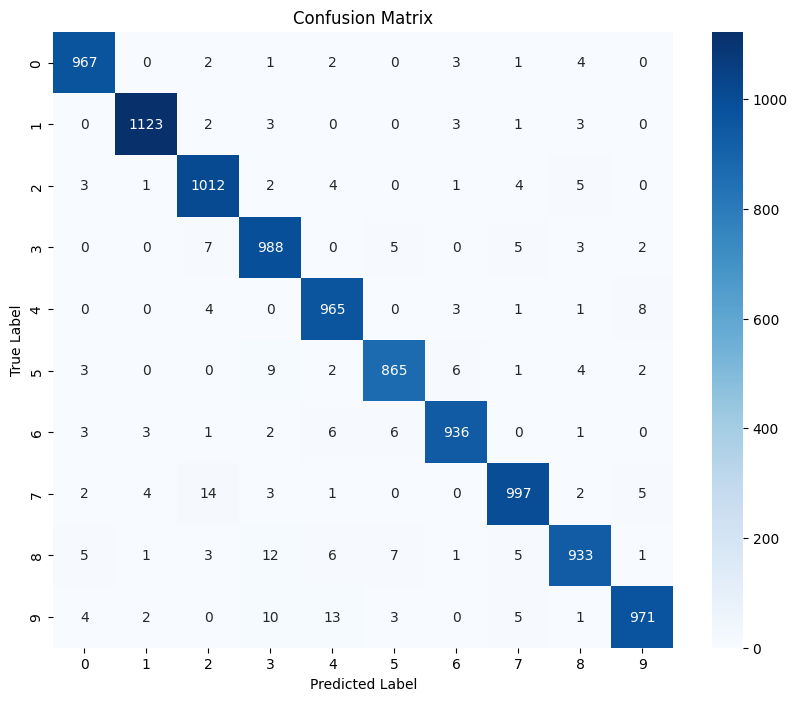

In [13]:
# Classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, predicted_classes))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Step 11: Sample predictions...


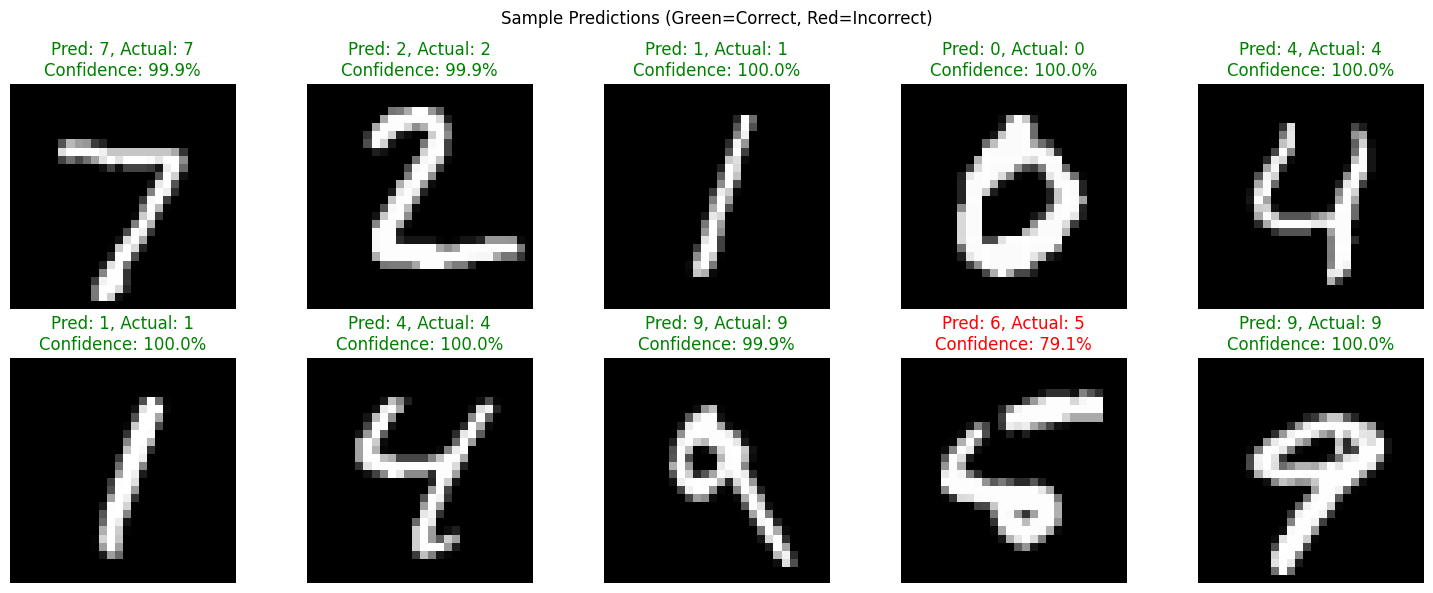

In [14]:
print("\nStep 11: Sample predictions...")
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_digit = predicted_classes[i]
    actual_digit = y_test[i]
    confidence = np.max(predictions[i]) * 100

    color = 'green' if predicted_digit == actual_digit else 'red'
    plt.title(f'Pred: {predicted_digit}, Actual: {actual_digit}\nConfidence: {confidence:.1f}%',
              color=color)
    plt.axis('off')
plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
plt.tight_layout()
plt.show()

# Step 12: Function to predict on new images
def predict_digit(image_array):
    """
    Predict digit for a single 28x28 image
    """
    # Ensure image is the right shape and normalized
    if image_array.shape != (28, 28):
        raise ValueError("Image must be 28x28 pixels")

    # Normalize and reshape
    image_normalized = image_array.astype('float32') / 255.0
    image_flattened = image_normalized.reshape(1, 784)

    # Make prediction
    prediction = model.predict(image_flattened, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    return predicted_digit, confidence

In [15]:
print("\nStep 12: Testing prediction function...")
test_image = x_test[0] * 255  # Convert back to original scale for demonstration
predicted_digit, confidence = predict_digit(test_image)
print(f"Predicted digit: {predicted_digit}")
print(f"Confidence: {confidence:.2f}%")
print(f"Actual digit: {y_test[0]}")


Step 12: Testing prediction function...
Predicted digit: 7
Confidence: 99.93%
Actual digit: 7


In [17]:
# Step 13: Save the model (optional)
print("\nStep 13: Saving the model...")
model.save('digit_classifier_model.h5')
print("Model saved as 'digit_classifier_model.h5'")

print("\n" + "="*50)
print("CONGRATULATIONS! You've successfully built a handwritten digit classifier!")
print("="*50)
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Step 13: Saving the model...
Model saved as 'digit_classifier_model.h5'

CONGRATULATIONS! You've successfully built a handwritten digit classifier!
Final Test Accuracy: 0.9757 (97.57%)


In [18]:
import os
print("Current directory:", os.getcwd())
print("Files in current directory:", os.listdir())

Current directory: /content
Files in current directory: ['.config', 'digit_classifier_model.h5', 'sample_data']


Step 14: Upload and predict on a new image...


Saving 1.jpg to 1 (1).jpg
User uploaded file "1 (1).jpg" with length 7002 bytes

Predicted digit: 5
Confidence: 98.23%


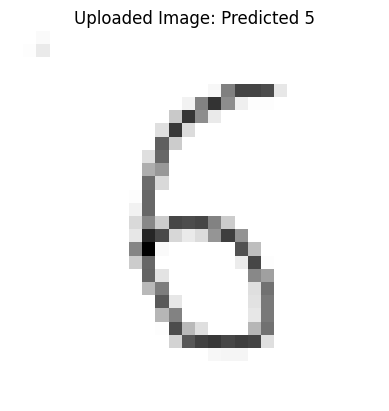

In [20]:
from google.colab import files
from PIL import Image
import io
import numpy as np

print("Step 14: Upload and predict on a new image...")

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    # Read image from bytes
    img = Image.open(io.BytesIO(uploaded[fn])).convert('L') # Convert to grayscale

    # Resize image to 28x28
    img_resized = img.resize((28, 28))

    # Convert image to numpy array and normalize
    img_array = np.array(img_resized)

    # Use the predict_digit function
    predicted_digit, confidence = predict_digit(img_array)

    print(f"\nPredicted digit: {predicted_digit}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the uploaded image
    plt.imshow(img_resized, cmap='gray')
    plt.title(f'Uploaded Image: Predicted {predicted_digit}')
    plt.axis('off')
    plt.show()

In [23]:
# Step 7: Train the model
print("\nStep 7: Training the model...")
history = model.fit(
    x_train_flattened,
    y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.1,  # Use 10% of training data for validation
    verbose=1
)


Step 7: Training the model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9875 - loss: 0.0374 - val_accuracy: 0.9795 - val_loss: 0.0749
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9872 - loss: 0.0361 - val_accuracy: 0.9792 - val_loss: 0.0733
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9900 - loss: 0.0324 - val_accuracy: 0.9783 - val_loss: 0.0774
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9887 - loss: 0.0329 - val_accuracy: 0.9808 - val_loss: 0.0827
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9802 - val_loss: 0.0775
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9902 - loss: 0.0287 - val_accuracy: 0.9818 - val_loss: 0.0694
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9897 - loss: 0.0283 - val_accuracy: 0.9805 - val_loss: 0.0753
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9918 - 

Step 14: Upload and predict on a new image...


Saving 1.jpg to 1 (2).jpg
User uploaded file "1 (2).jpg" with length 7002 bytes

Predicted digit: 5
Confidence: 100.00%


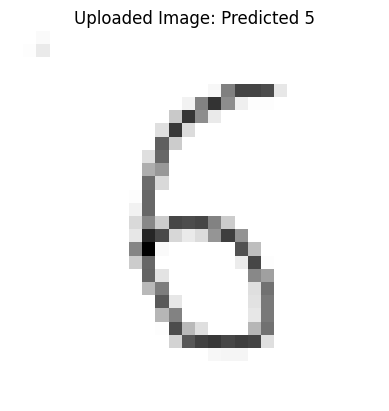

In [24]:
from google.colab import files
from PIL import Image
import io
import numpy as np

print("Step 14: Upload and predict on a new image...")

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    # Read image from bytes
    img = Image.open(io.BytesIO(uploaded[fn])).convert('L') # Convert to grayscale

    # Resize image to 28x28
    img_resized = img.resize((28, 28))

    # Convert image to numpy array and normalize
    img_array = np.array(img_resized)

    # Use the predict_digit function
    predicted_digit, confidence = predict_digit(img_array)

    print(f"\nPredicted digit: {predicted_digit}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the uploaded image
    plt.imshow(img_resized, cmap='gray')
    plt.title(f'Uploaded Image: Predicted {predicted_digit}')
    plt.axis('off')
    plt.show()


In [29]:
# Quick Handwritten Digit Classifier with File Upload Testing
# Optimized for fast training and real-world testing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files, drive
from PIL import Image
import cv2

print("🚀 Quick Digit Classifier Training Started!")

# PART 1: QUICK MODEL TRAINING
print("\n📊 Loading and preparing data...")

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Quick preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

# Convert labels to categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print("✅ Data prepared!")

# Build optimized model for quick training
print("\n🧠 Building neural network...")
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile with faster settings
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model built!")

# Quick training (fewer epochs for speed)
print("\n🔥 Training model (this will take 2-3 minutes)...")
history = model.fit(
    x_train_flat, y_train_cat,
    epochs=5,  # Reduced for speed
    batch_size=256,  # Larger batch for speed
    validation_split=0.1,
    verbose=1
)

# Quick evaluation
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"\n🎯 Model trained! Test accuracy: {test_accuracy*100:.2f}%")

# Save model to Google Drive for persistence
print("\n💾 Saving model...")
try:
    drive.mount('/content/drive')
    model.save('/content/drive/MyDrive/models/quick_digit_classifier.h5')
    print("✅ Model saved to Google Drive!")
except:
    model.save('quick_digit_classifier.h5')
    print("✅ Model saved locally!")

print("\n" + "="*50)
print("🎉 TRAINING COMPLETE! Now you can upload your own digits to test!")
print("="*50)

# PART 2: FILE UPLOAD AND TESTING SYSTEM
def preprocess_uploaded_image(image_path):
    """
    Convert uploaded image to format suitable for our model
    """
    try:
        # Load image
        img = Image.open(image_path)

        # Convert to grayscale if needed
        if img.mode != 'L':
            img = img.convert('L')

        # Resize to 28x28
        img = img.resize((28, 28), Image.LANCZOS)

        # Convert to numpy array
        img_array = np.array(img)

        # Invert colors if needed (white background to black)
        # MNIST digits are white on black background
        if np.mean(img_array) > 127:  # If background is mostly white
            img_array = 255 - img_array

        # Normalize to 0-1 range
        img_array = img_array.astype('float32') / 255.0

        # Flatten for model input
        img_flattened = img_array.reshape(1, 784)

        return img_array, img_flattened, True

    except Exception as e:
        print(f"❌ Error processing image: {e}")
        return None, None, False

def predict_uploaded_digit(model, image_path):
    """
    Predict digit from uploaded image file
    """
    # Preprocess the image
    img_display, img_model_input, success = preprocess_uploaded_image(image_path)

    if not success:
        return None, None, None

    # Make prediction
    prediction = model.predict(img_model_input, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    return img_display, predicted_digit, confidence

# PART 3: INTERACTIVE TESTING INTERFACE
def test_with_uploaded_files():
    """
    Upload and test your own handwritten digits!
    """
    print("\n📤 UPLOAD YOUR HANDWRITTEN DIGITS!")
    print("Tips for best results:")
    print("- Draw digits clearly on white background")
    print("- Use dark pen/pencil")
    print("- Make digits fill most of the image")
    print("- Save as PNG, JPG, or JPEG")

    # Upload files
    uploaded_files = files.upload()

    if not uploaded_files:
        print("No files uploaded.")
        return

    # Test each uploaded file
    plt.figure(figsize=(15, 5))
    plot_count = 0

    for filename, file_content in uploaded_files.items():
        print(f"\n🔍 Testing file: {filename}")

        # Save uploaded file temporarily
        with open(filename, 'wb') as f:
            f.write(file_content)

        # Make prediction
        img_display, predicted_digit, confidence = predict_uploaded_digit(model, filename)

        if img_display is not None:
            # Display result
            plot_count += 1
            plt.subplot(1, len(uploaded_files), plot_count)
            plt.imshow(img_display, cmap='gray')
            plt.title(f'File: {filename}\nPredicted: {predicted_digit}\nConfidence: {confidence:.1f}%')
            plt.axis('off')

            print(f"🎯 Prediction: {predicted_digit}")
            print(f"📊 Confidence: {confidence:.2f}%")
        else:
            print(f"❌ Could not process {filename}")

    if plot_count > 0:
        plt.tight_layout()
        plt.show()

# PART 4: QUICK MODEL TESTING ON MNIST
def quick_test_mnist_samples():
    """
    Quick test on some MNIST samples to verify model works
    """
    print("\n🧪 Quick test on MNIST samples...")

    # Test on 5 random samples
    test_indices = np.random.choice(len(x_test), 5)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(test_indices):
        # Make prediction
        img_input = x_test_flat[idx:idx+1]
        prediction = model.predict(img_input, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        actual_digit = y_test[idx]

        # Display
        plt.subplot(1, 5, i+1)
        plt.imshow(x_test[idx], cmap='gray')
        color = 'green' if predicted_digit == actual_digit else 'red'
        plt.title(f'Pred: {predicted_digit}, Actual: {actual_digit}\nConf: {confidence:.1f}%', color=color)
        plt.axis('off')

    plt.suptitle('Quick MNIST Test (Green=Correct, Red=Wrong)')
    plt.tight_layout()
    plt.show()

# PART 5: RUN EVERYTHING
print("\n🎯 Running quick MNIST test first...")
quick_test_mnist_samples()

print("\n" + "="*60)
print("🚀 MODEL IS READY! Now upload your own handwritten digits!")
print("="*60)

# Uncomment the line below to start file upload testing
# test_with_uploaded_files()

print("""
📋 NEXT STEPS:
1. Uncomment the last line: test_with_uploaded_files()
2. Run the cell again
3. Upload your digit images when prompted
4. See your results!

💡 TIPS FOR BEST RESULTS:
- Draw digits on white paper with dark pen
- Take clear photos or scan
- Crop to show mainly the digit
- Use common image formats (PNG, JPG)
""")

# BONUS: Save model info for easy loading later
model_info = {
    'accuracy': test_accuracy,
    'architecture': 'Dense layers: 784->256->128->10',
    'training_epochs': 5,
    'date_trained': 'today'
}

print(f"\n📈 Model Performance Summary:")
print(f"   Accuracy: {model_info['accuracy']*100:.2f}%")
print(f"   Architecture: {model_info['architecture']}")
print(f"   Training time: ~3 minutes")

# Function to quickly reload and use model
def quick_load_and_predict():
    """
    Quick function to reload model and start predicting
    """
    try:
        # Try loading from Google Drive first
        drive.mount('/content/drive')
        model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/quick_digit_classifier.h5')
        print("✅ Model loaded from Google Drive!")
    except:
        try:
            # Try loading from local storage
            model = keras.models.load_model('quick_digit_classifier.h5')
            print("✅ Model loaded locally!")
        except:
            print("❌ Model not found! Please train the model first.")
            return None

    return model

print(f"\n🔄 To reload your model later, use: quick_load_and_predict()")

🚀 Quick Digit Classifier Training Started!

📊 Loading and preparing data...
✅ Data prepared!

🧠 Building neural network...
✅ Model built!

🔥 Training model (this will take 2-3 minutes)...
Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7504 - loss: 0.8109 - val_accuracy: 0.9577 - val_loss: 0.1507
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9377 - loss: 0.2099 - val_accuracy: 0.9712 - val_loss: 0.0964
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9581 - loss: 0.1426 - val_accuracy: 0.9763 - val_loss: 0.0834
Epoch 4/5
152/211 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9639 - loss: 0.1151

KeyboardInterrupt: 


📤 UPLOAD YOUR HANDWRITTEN DIGITS!
Tips for best results:
- Draw digits clearly on white background
- Use dark pen/pencil
- Make digits fill most of the image
- Save as PNG, JPG, or JPEG


Saving 1.jpg to 1 (4).jpg

🔍 Testing file: 1 (4).jpg
🎯 Prediction: 6
📊 Confidence: 31.32%


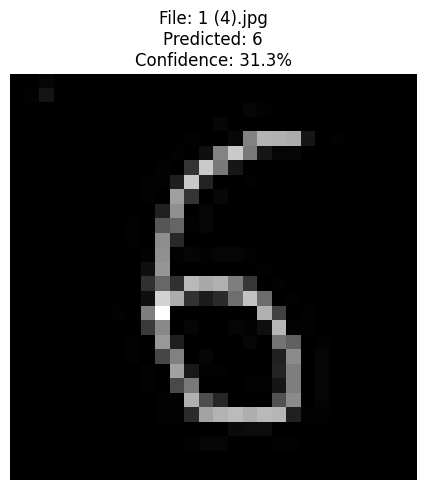

In [28]:
test_with_uploaded_files()


🚀 Loading your pre-trained digit classifier...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
❌ Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/models/quick_digit_classifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Please check if the file exists at the specified path.

🧪 Quick verification test with MNIST data...


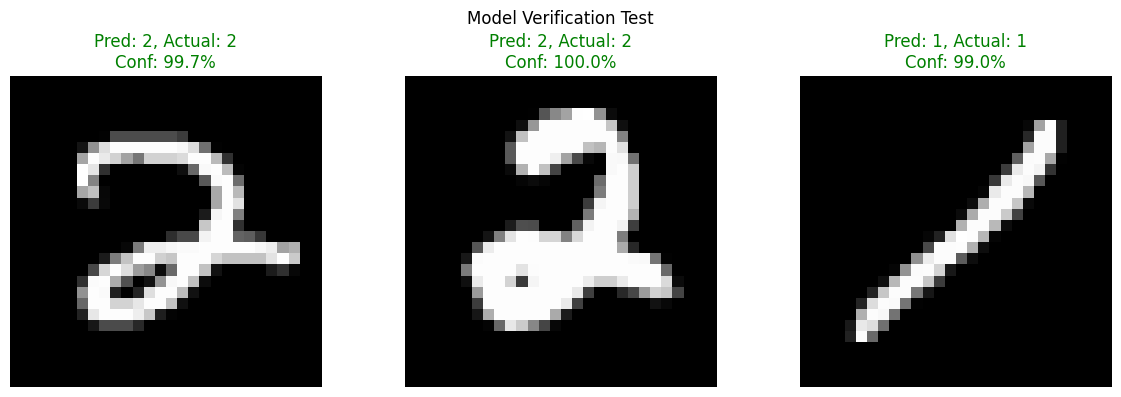

✅ Model verification complete!

🎯 YOUR MODEL IS LOADED AND READY!
To test with your own images, run:
test_your_digits()


In [30]:
# Load Pre-trained Model and Test with Uploaded Images
# No training required - direct testing!

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files, drive
from PIL import Image
import os

print("🚀 Loading your pre-trained digit classifier...")

# Mount Google Drive and load your model
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/models/quick_digit_classifier.h5'

try:
    model = keras.models.load_model(model_path)
    print("✅ Model loaded successfully!")
    print(f"📍 Loaded from: {model_path}")

    # Display model info
    print(f"\n📋 Model Summary:")
    model.summary()

except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please check if the file exists at the specified path.")
    exit()

# Image preprocessing function
def preprocess_image(image_path):
    """
    Convert uploaded image to format suitable for digit classification
    """
    try:
        print(f"🔄 Processing: {image_path}")

        # Load image
        img = Image.open(image_path)
        original_img = img.copy()

        # Convert to grayscale
        if img.mode != 'L':
            img = img.convert('L')
            print("   ✓ Converted to grayscale")

        # Resize to 28x28 (MNIST format)
        img_resized = img.resize((28, 28), Image.LANCZOS)
        print("   ✓ Resized to 28x28")

        # Convert to numpy array
        img_array = np.array(img_resized)

        # Check if we need to invert colors
        # MNIST has white digits on black background
        mean_pixel = np.mean(img_array)
        if mean_pixel > 127:  # Light background detected
            img_array = 255 - img_array  # Invert
            print("   ✓ Colors inverted (white bg → black bg)")

        # Normalize to 0-1 range
        img_normalized = img_array.astype('float32') / 255.0

        # Flatten for model input
        img_flattened = img_normalized.reshape(1, 784)
        print("   ✓ Normalized and flattened")

        return original_img, img_array, img_flattened, True

    except Exception as e:
        print(f"   ❌ Error: {e}")
        return None, None, None, False

# Prediction function
def predict_digit(model, image_path):
    """
    Predict digit from uploaded image
    """
    original, processed, model_input, success = preprocess_image(image_path)

    if not success:
        return None

    # Make prediction
    prediction = model.predict(model_input, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Get all probabilities for detailed analysis
    all_probabilities = prediction[0] * 100

    return {
        'original_image': original,
        'processed_image': processed,
        'predicted_digit': predicted_digit,
        'confidence': confidence,
        'all_probabilities': all_probabilities,
        'filename': os.path.basename(image_path)
    }

# Visualization function
def display_results(results_list):
    """
    Display all uploaded images with their predictions
    """
    num_images = len(results_list)
    if num_images == 0:
        print("No valid images to display.")
        return

    # Create subplots
    fig, axes = plt.subplots(2, num_images, figsize=(4*num_images, 8))
    if num_images == 1:
        axes = axes.reshape(2, 1)

    for i, result in enumerate(results_list):
        # Original image
        axes[0, i].imshow(result['original_image'], cmap='gray')
        axes[0, i].set_title(f"Original: {result['filename']}", fontsize=10)
        axes[0, i].axis('off')

        # Processed image with prediction
        axes[1, i].imshow(result['processed_image'], cmap='gray')
        confidence_color = 'green' if result['confidence'] > 80 else 'orange' if result['confidence'] > 60 else 'red'
        axes[1, i].set_title(f"Predicted: {result['predicted_digit']}\nConfidence: {result['confidence']:.1f}%",
                           color=confidence_color, fontsize=12, fontweight='bold')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

    # Print detailed results
    print("\n📊 DETAILED RESULTS:")
    print("="*50)
    for i, result in enumerate(results_list):
        print(f"\n📁 File: {result['filename']}")
        print(f"🎯 Prediction: {result['predicted_digit']}")
        print(f"📈 Confidence: {result['confidence']:.2f}%")

        # Show top 3 predictions
        top_3_indices = np.argsort(result['all_probabilities'])[-3:][::-1]
        print("   Top 3 possibilities:")
        for j, idx in enumerate(top_3_indices):
            print(f"   {j+1}. Digit {idx}: {result['all_probabilities'][idx]:.1f}%")

# Main testing function
def test_your_digits():
    """
    Main function to upload and test your handwritten digits
    """
    print("\n🎨 READY TO TEST YOUR HANDWRITTEN DIGITS!")
    print("="*50)
    print("Upload images of handwritten digits (0-9)")
    print("Supported formats: PNG, JPG, JPEG")
    print("For best results: clear digits on white background")
    print("="*50)

    # Upload files
    uploaded_files = files.upload()

    if not uploaded_files:
        print("❌ No files uploaded.")
        return

    print(f"\n📥 Uploaded {len(uploaded_files)} file(s)")

    # Process each uploaded file
    results = []
    for filename in uploaded_files.keys():
        print(f"\n🔍 Analyzing: {filename}")
        result = predict_digit(model, filename)

        if result:
            results.append(result)
            print(f"   ✅ Success! Predicted: {result['predicted_digit']} ({result['confidence']:.1f}% confidence)")
        else:
            print(f"   ❌ Failed to process {filename}")

    # Display all results
    if results:
        display_results(results)
        print(f"\n🎉 Successfully classified {len(results)} digit(s)!")
    else:
        print("\n❌ No images could be processed successfully.")

# Quick MNIST test to verify model works
def quick_verification_test():
    """
    Quick test on MNIST data to verify the loaded model works
    """
    print("\n🧪 Quick verification test with MNIST data...")

    # Load some test data
    (_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_test = x_test.astype('float32') / 255.0
    x_test_flat = x_test.reshape(10000, 784)

    # Test on 3 random samples
    test_indices = np.random.choice(len(x_test), 3)

    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(test_indices):
        prediction = model.predict(x_test_flat[idx:idx+1], verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        actual_digit = y_test[idx]

        plt.subplot(1, 3, i+1)
        plt.imshow(x_test[idx], cmap='gray')
        color = 'green' if predicted_digit == actual_digit else 'red'
        plt.title(f'Pred: {predicted_digit}, Actual: {actual_digit}\nConf: {confidence:.1f}%', color=color)
        plt.axis('off')

    plt.suptitle('Model Verification Test')
    plt.tight_layout()
    plt.show()

    print("✅ Model verification complete!")

# Run verification test
quick_verification_test()

print("\n" + "="*60)
print("🎯 YOUR MODEL IS LOADED AND READY!")
print("="*60)
print("To test with your own images, run:")
print("test_your_digits()")
print("="*60)

# Uncomment the line below to start uploading and testing your own digits
# test_your_digits()

🚀 Loading your digit classifier from MyDrive/models...
✅ Drive already mounted
🔄 Loading model from: /content/drive/MyDrive/models/digit_classifier_model.h5
✅ MODEL LOADED SUCCESSFULLY!

📋 Your Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


🧪 Quick model verification with MNIST data...


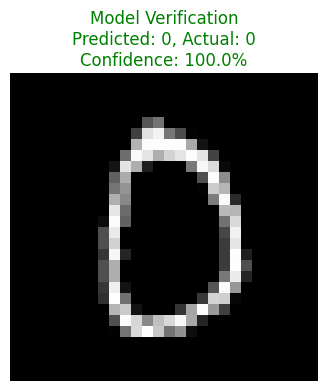

🎯 Verification: Predicted 0, Actual 0 (✅ CORRECT)

🎉 YOUR MODEL IS LOADED AND READY!
To test with your own handwritten digits, run:
upload_and_test_digits()

🎨 UPLOAD YOUR HANDWRITTEN DIGITS!
📝 For best results:
   • Draw digits clearly with dark pen
   • Use white/light background
   • Make digit fill most of the image
   • Upload PNG, JPG, or JPEG files


Saving 1.jpg to 1 (5).jpg

📥 Processing 1 file(s)...

🔍 Analyzing: 1 (5).jpg
   🎯 Prediction: 6
   📊 Confidence: 26.0%

🖼️  VISUAL RESULTS:


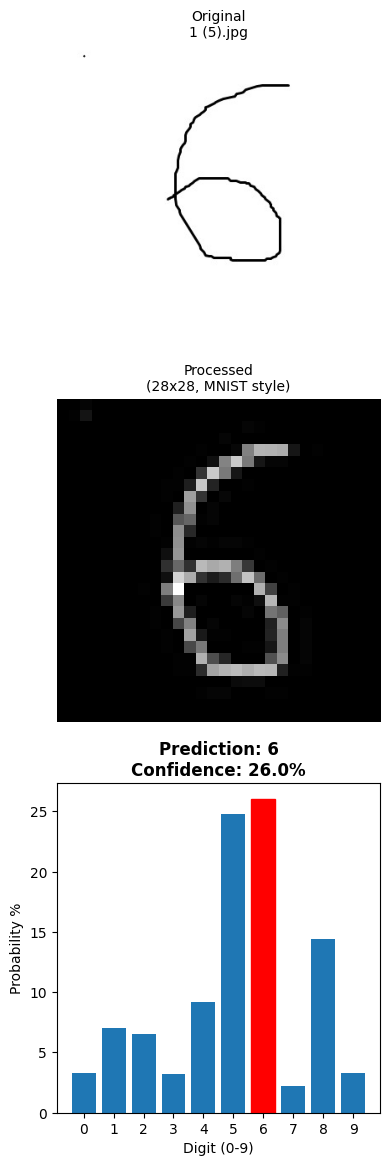


📊 DETAILED SUMMARY:

📁 File 1: 1 (5).jpg
   🎯 Predicted: 6
   📈 Confidence: 26.01%
   🏆 Top 3 possibilities:
      1. Digit 6: 26.0%
      2. Digit 5: 24.8%
      3. Digit 8: 14.4%


In [2]:
# Load Your Digit Model from MyDrive/models and Test with Upload
# Direct loading from your specified folder

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files, drive
from PIL import Image
import os

print("🚀 Loading your digit classifier from MyDrive/models...")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
else:
    print("✅ Drive already mounted")

# Direct path to your model
model_path = '/content/drive/MyDrive/models/digit_classifier_model.h5'

# Load your model
try:
    print(f"🔄 Loading model from: {model_path}")
    model = keras.models.load_model(model_path)
    print("✅ MODEL LOADED SUCCESSFULLY!")

    # Show model summary
    print(f"\n📋 Your Model Summary:")
    model.summary()

except FileNotFoundError:
    print(f"❌ Model not found at: {model_path}")
    print("\n🔍 Let me check what's in your models folder:")
    models_dir = '/content/drive/MyDrive/models/'
    if os.path.exists(models_dir):
        files_in_models = os.listdir(models_dir)
        print(f"📁 Files in {models_dir}:")
        for file in files_in_models:
            print(f"   📄 {file}")
    else:
        print(f"📁 Models folder doesn't exist: {models_dir}")
    exit()

except Exception as e:
    print(f"❌ Error loading model: {e}")
    exit()

# Image preprocessing functions
def preprocess_image(image_path):
    """
    Convert uploaded image to model-ready format
    """
    try:
        # Load image
        img = Image.open(image_path)
        original = img.copy()

        # Convert to grayscale
        if img.mode != 'L':
            img = img.convert('L')

        # Resize to 28x28 (MNIST size)
        img = img.resize((28, 28), Image.LANCZOS)
        img_array = np.array(img)

        # Invert colors if background is light (MNIST style)
        if np.mean(img_array) > 127:
            img_array = 255 - img_array

        # Normalize to 0-1
        img_normalized = img_array.astype('float32') / 255.0

        # Flatten for neural network
        img_flat = img_normalized.reshape(1, 784)

        return original, img_array, img_flat, True

    except Exception as e:
        print(f"❌ Error processing image: {e}")
        return None, None, None, False

def predict_digit(image_path):
    """
    Predict digit from uploaded image
    """
    original, processed, model_input, success = preprocess_image(image_path)

    if not success:
        return None

    # Get prediction
    prediction = model.predict(model_input, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    all_probabilities = prediction[0] * 100

    return {
        'filename': os.path.basename(image_path),
        'original_image': original,
        'processed_image': processed,
        'predicted_digit': predicted_digit,
        'confidence': confidence,
        'all_probabilities': all_probabilities
    }

# Main upload and test function
def upload_and_test_digits():
    """
    Upload your handwritten digits and see predictions!
    """
    print("\n🎨 UPLOAD YOUR HANDWRITTEN DIGITS!")
    print("="*60)
    print("📝 For best results:")
    print("   • Draw digits clearly with dark pen")
    print("   • Use white/light background")
    print("   • Make digit fill most of the image")
    print("   • Upload PNG, JPG, or JPEG files")
    print("="*60)

    # Upload files
    uploaded = files.upload()

    if not uploaded:
        print("❌ No files uploaded.")
        return

    print(f"\n📥 Processing {len(uploaded)} file(s)...")

    # Process all uploaded files
    results = []
    for filename in uploaded.keys():
        print(f"\n🔍 Analyzing: {filename}")
        result = predict_digit(filename)
        if result:
            results.append(result)
            print(f"   🎯 Prediction: {result['predicted_digit']}")
            print(f"   📊 Confidence: {result['confidence']:.1f}%")

    if not results:
        print("❌ No images could be processed.")
        return

    # Display visual results
    print(f"\n🖼️  VISUAL RESULTS:")
    fig, axes = plt.subplots(3, len(results), figsize=(4*len(results), 12))
    if len(results) == 1:
        axes = axes.reshape(3, 1)

    for i, result in enumerate(results):
        # Original image
        axes[0, i].imshow(result['original_image'], cmap='gray')
        axes[0, i].set_title(f"Original\n{result['filename']}", fontsize=10)
        axes[0, i].axis('off')

        # Processed image
        axes[1, i].imshow(result['processed_image'], cmap='gray')
        axes[1, i].set_title("Processed\n(28x28, MNIST style)", fontsize=10)
        axes[1, i].axis('off')

        # Prediction probabilities
        bars = axes[2, i].bar(range(10), result['all_probabilities'])
        bars[result['predicted_digit']].set_color('red')
        axes[2, i].set_title(f"Prediction: {result['predicted_digit']}\nConfidence: {result['confidence']:.1f}%",
                           fontsize=12, fontweight='bold')
        axes[2, i].set_xlabel('Digit (0-9)')
        axes[2, i].set_ylabel('Probability %')
        axes[2, i].set_xticks(range(10))

    plt.tight_layout()
    plt.show()

    # Detailed summary
    print(f"\n📊 DETAILED SUMMARY:")
    print("="*60)
    for result in enumerate(results):
        i, res = result
        print(f"\n📁 File {i+1}: {res['filename']}")
        print(f"   🎯 Predicted: {res['predicted_digit']}")
        print(f"   📈 Confidence: {res['confidence']:.2f}%")

        # Top 3 alternatives
        top_3 = np.argsort(res['all_probabilities'])[-3:][::-1]
        print(f"   🏆 Top 3 possibilities:")
        for j, digit in enumerate(top_3):
            print(f"      {j+1}. Digit {digit}: {res['all_probabilities'][digit]:.1f}%")

# Test the model with a quick MNIST verification
print("\n🧪 Quick model verification with MNIST data...")
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test_norm = x_test.astype('float32') / 255.0
x_test_flat = x_test_norm.reshape(10000, 784)

# Test on one random sample
test_idx = np.random.randint(0, len(x_test))
verification_pred = model.predict(x_test_flat[test_idx:test_idx+1], verbose=0)
pred = np.argmax(verification_pred)
conf = np.max(verification_pred) * 100
actual = y_test[test_idx]

plt.figure(figsize=(6, 4))
plt.imshow(x_test[test_idx], cmap='gray')
color = 'green' if pred == actual else 'red'
plt.title(f'Model Verification\nPredicted: {pred}, Actual: {actual}\nConfidence: {conf:.1f}%', color=color)
plt.axis('off')
plt.show()

print(f"🎯 Verification: Predicted {pred}, Actual {actual} ({'✅ CORRECT' if pred == actual else '❌ WRONG'})")

print("\n" + "="*60)
print("🎉 YOUR MODEL IS LOADED AND READY!")
print("="*60)
print("To test with your own handwritten digits, run:")
print("upload_and_test_digits()")
print("="*60)

# Uncomment the line below to immediately start uploading and testing:
upload_and_test_digits()